In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank_marketing.csv', header = 0, sep =';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.skew()

age          0.685238
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [8]:
df.groupby('deposit').size()

deposit
no     39922
yes     5289
dtype: int64

In [9]:
df.isnull().sum()

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
16,45.0,admin.,single,unknown,NaN,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
21,NaN,management,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,no
22,32.0,blue-collar,single,primary,NaN,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no
28,NaN,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,22.0,student,single,secondary,NaN,2488,no,no,cellular,8,nov,449,2,38,10,other,yes
45158,NaN,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45166,41.0,unemployed,single,tertiary,no,79,no,no,NaN,9,nov,394,1,390,2,success,yes
45170,NaN,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no


In [11]:
###temporary
df['age'].fillna(value=df['age'].mean(), inplace = True)
df['default'].fillna(value='unknown', inplace = True)

In [12]:
### recasting to appropriate data type
df['age']=df['age'].astype('int')
df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['contact']=df['contact'].astype('category')
df['month']=df['month'].astype('category')
df['poutcome']=df['poutcome'].astype('category')

In [13]:
df1 = df[df['poutcome']=='success']
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
24165,30,admin.,married,secondary,no,873,yes,no,telephone,12,nov,119,1,167,3,success,no
24239,48,admin.,divorced,secondary,no,295,yes,no,cellular,17,nov,123,1,164,2,success,no
24264,49,management,married,tertiary,no,64,no,no,cellular,17,nov,208,1,159,1,success,no
24435,42,technician,married,tertiary,no,14282,yes,no,cellular,17,nov,77,1,103,4,success,no


In [14]:
df2 = df[df['deposit']=='yes']
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,unknown,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
df2.shape

(5289, 17)

In [16]:
df1.shape

(1511, 17)

In [17]:
df['deposit'].describe()

count     45211
unique        2
top          no
freq      39922
Name: deposit, dtype: object

In [21]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

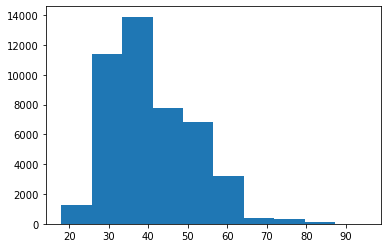

In [22]:
plt.hist(df['age'])
plt.show()

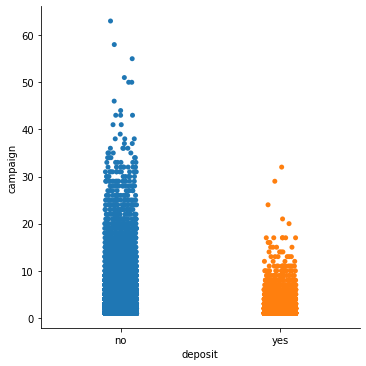

In [26]:
sns.catplot(x = 'deposit', y = 'campaign', data=df)